In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
df = pd.read_csv('gld_price_data.csv')

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
df.shape

(2290, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
## Correlation
correlation = df.corr()

/var/folders/ss/v59ygfzj7m1dkgsklj3ck7m80000gn/T/ipykernel_74644/2482150073.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

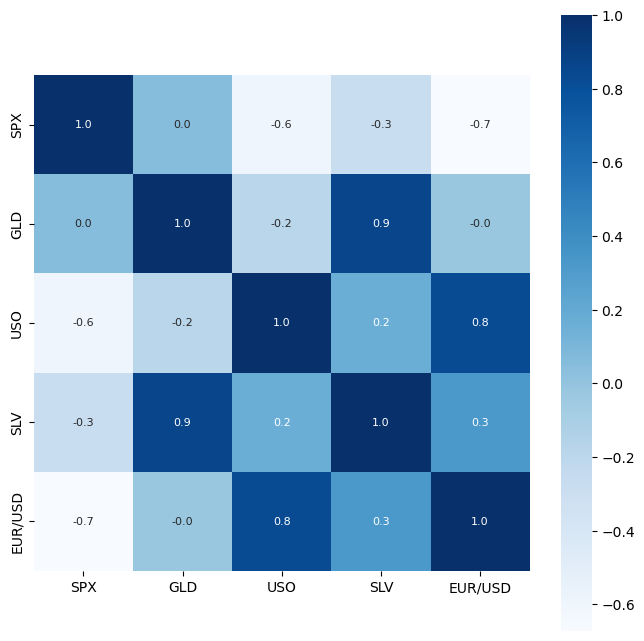

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')


In [11]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/var/folders/ss/v59ygfzj7m1dkgsklj3ck7m80000gn/T/ipykernel_74644/1428526023.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

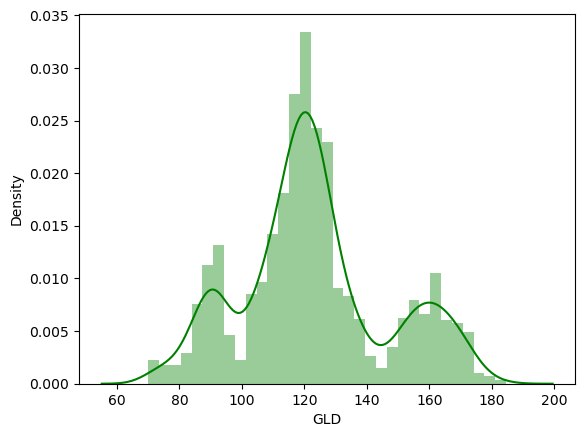

In [12]:
# checking distribution of GLD Price
sns.distplot(df['GLD'], color='green')

In [13]:
X = df.drop(['Date', 'GLD'], axis=1)
y = df['GLD']

In [14]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [15]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [17]:
### HYPERPARAMETER GRIDSEARCHCV
from sklearn.model_selection import GridSearchCV

In [18]:
parameters = {'n_estimators':[100,200]}

In [19]:
rf = RandomForestRegressor()

In [20]:
model = GridSearchCV(rf, parameters)

In [21]:
model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 200]})

In [22]:
## EVALUATION OF THE MODEL 
test_pred = model.predict(X_test)

In [23]:
test_pred

array([122.54119925, 130.40170319, 127.71620011,  96.66039748,
       119.07120053, 114.43599921, 124.76530152, 117.74149908,
       108.08070131,  98.41469951,  95.62969887, 167.53939869,
       149.15620149, 116.67300052, 170.61990121,  84.76719991,
       123.0360987 , 109.84809773, 113.21020078, 131.62260295,
       124.35709864, 113.68700105, 116.17190038, 108.74809985,
       108.52760177, 125.88049902, 119.49459977, 112.77879877,
       113.23570124, 125.47359881, 146.08920137,  89.56759978,
       167.94909972, 113.68599952, 108.38910116, 120.17630104,
       141.65579823, 161.23990089, 174.12499829, 153.18890141,
       119.48990101, 113.35000021, 121.35409951, 113.77619961,
       122.08329986, 108.07920099,  88.70689914, 114.32169908,
       129.62590197, 117.93020101, 104.14590022, 129.687502  ,
       107.18119821, 160.8680041 , 131.60950067, 118.08689973,
       146.87150094, 136.08550254,  95.74480072, 124.51160128,
       115.01729846,  86.22800108, 104.24249898, 113.99

In [24]:
from sklearn.metrics import r2_score

In [25]:
error_score = r2_score(y_test, test_pred)
print("R Squared Error : ",error_score )

R Squared Error :  0.9898957289585241


In [26]:
Y_test = list(y_test)

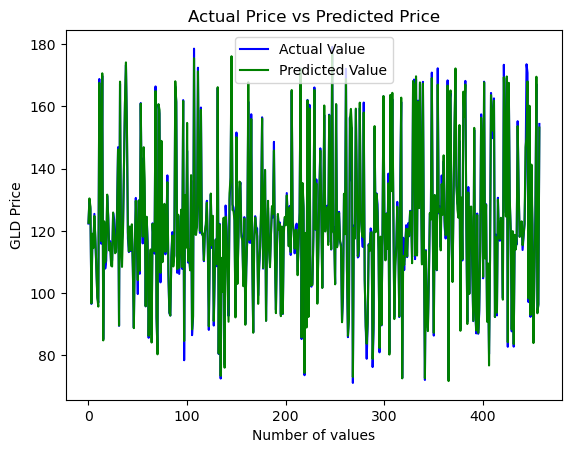

In [27]:
## FINAL VISUALIZATION

plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_pred, color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()